In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error, explained_variance_score

1. Load your zillow dataset.

In [2]:
df=pd.read_csv('clean_zillow.csv')

In [3]:
df=df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,12.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,6.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,91.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,45.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,44.0


# RMSE= sklearn.mean_squared_error('squared = False')

Exercises
Do your work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

#assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
Modify and add to the code above as necessary for it to work with the zillow dataset.

In [5]:
df1 = pd.concat([df.Square_Feet, df.Total_Home_Value], axis=1)


In [6]:
df1.head()

,Square_Feet,Total_Home_Value
0,3633.0,296425.0
1,1620.0,847770.0
2,2077.0,646760.0
3,1200.0,5328.0
4,171.0,6920.0


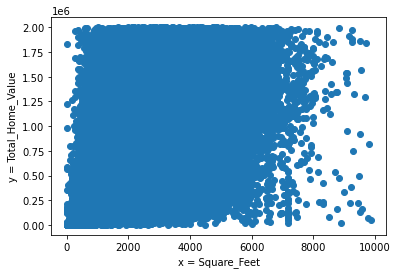

In [7]:
# look at scatter of x vs y
plt.scatter(df1.Square_Feet, df.Total_Home_Value)

plt.xlabel('x = Square_Feet')
plt.ylabel('y = Total_Home_Value')
plt.show()

In [8]:
baseline = df1['Total_Home_Value'].mean()
baseline


394488.21993695776

In [9]:
#add it to the df
df1['baseline'] = baseline

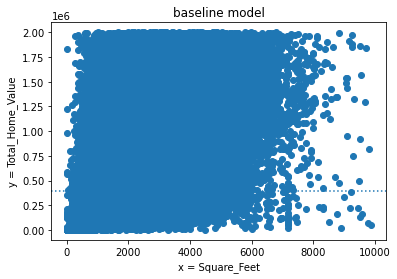

In [10]:
# plot data with baseline:
plt.scatter(df1.Square_Feet, df1.Total_Home_Value)
plt.axhline(baseline, ls=':')

plt.xlabel('x = Square_Feet')
plt.ylabel('y = Total_Home_Value')
plt.title('baseline model')
plt.show()

In [11]:
df1.head()

,Square_Feet,Total_Home_Value,baseline
0,3633.0,296425.0,394488.219937
1,1620.0,847770.0,394488.219937
2,2077.0,646760.0,394488.219937
3,1200.0,5328.0,394488.219937
4,171.0,6920.0,394488.219937


In [12]:
from sklearn.linear_model import LinearRegression
# OLS = ordinary least squares
# create the model object
lm = LinearRegression()

# fit the model to training data
lm.fit(df1[['Square_Feet']], df1.Total_Home_Value)

# make prediction
# lm.predict will output a numpy array of values,
# we will put those values into a series in df
df1['yhat'] = lm.predict(df1[['Square_Feet']])

In [13]:
df1.head()

,Square_Feet,Total_Home_Value,baseline,yhat
0,3633.0,296425.0,394488.219937,821856.726439
1,1620.0,847770.0,394488.219937,356968.598708
2,2077.0,646760.0,394488.219937,462509.519907
3,1200.0,5328.0,394488.219937,259972.566097
4,171.0,6920.0,394488.219937,22332.286199


Variables
- x: Square_Feet
- y: Total_Home_Value
- baseline: Total_Home_Value baseline prediction
- yhat: Total_Home_Value OLS prediction

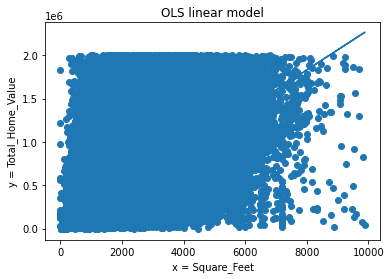

In [14]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(df1.Square_Feet, df1.Total_Home_Value)

#lineplot is my regression line
plt.plot(df1.Square_Feet, df1.yhat)

plt.xlabel('x = Square_Feet')
plt.ylabel('y = Total_Home_Value')
plt.title('OLS linear model')
plt.show()


3. Plot the residuals for the linear regression model that you made.

In [15]:
# compute residuals - Residual: error (change in actual and predicted)
# residual = actual - predicted
df1['baseline_residual'] = df1.Total_Home_Value - df1.baseline
df1['residual'] = df1.Total_Home_Value - df1.yhat

In [16]:
df1.head()

,Square_Feet,Total_Home_Value,baseline,yhat,baseline_residual,residual
0,3633.0,296425.0,394488.219937,821856.726439,-98063.219937,-525431.726439
1,1620.0,847770.0,394488.219937,356968.598708,453281.780063,490801.401292
2,2077.0,646760.0,394488.219937,462509.519907,252271.780063,184250.480093
3,1200.0,5328.0,394488.219937,259972.566097,-389160.219937,-254644.566097
4,171.0,6920.0,394488.219937,22332.286199,-387568.219937,-15412.286199


In [ ]:
sns.scatterplot(data=df1, x= "Total_Home_Value", y="residual")
plt.xlabel('ome value')
plt.ylabel()
plt.title
plt.show()

In [17]:
#baseline residual sum
df1.baseline_residual.sum()

4.146993160247803e-05

In [18]:
#osl residual sum
df1.residual.sum()

5.498528480529785e-06

4a. Calculate for your model:
-sum of squared errors
-mean squared error
-root mean squared error 

5. Calculate for the baseline model:
-sum of squared errors
-mean squared error
-root mean squared error

In [19]:
#SSE (Sum of Squared Errors)
# the difference between yhat and y, just squared
df1['baseline_residual_2'] = df1.baseline_residual**2
df1['residual_2'] = df1.residual**2

In [20]:
df1.head()

,Square_Feet,Total_Home_Value,baseline,yhat,baseline_residual,residual,baseline_residual_2,residual_2
0,3633.0,296425.0,394488.219937,821856.726439,-98063.219937,-525431.726439,9.616395e+09,2.760785e+11
1,1620.0,847770.0,394488.219937,356968.598708,453281.780063,490801.401292,2.054644e+11,2.408860e+11
2,2077.0,646760.0,394488.219937,462509.519907,252271.780063,184250.480093,6.364105e+10,3.394824e+10
3,1200.0,5328.0,394488.219937,259972.566097,-389160.219937,-254644.566097,1.514457e+11,6.484386e+10
4,171.0,6920.0,394488.219937,22332.286199,-387568.219937,-15412.286199,1.502091e+11,2.375386e+08


In [21]:
#add the residuals together
SSE_baseline = df1.baseline_residual_2.sum()
SSE = df1.residual_2.sum()

In [22]:
#compare 
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE Baseline = 196365606565941952.0
SSE = 132761251645543104.0


In [23]:
SSE_baseline > SSE

True

MSE (Mean Squared Error)-the average of your errors that have each been squared.  
MSE = SSE/(no. of data points)

In [24]:
#calcaluate MSE
MSE_baseline = SSE_baseline/len(df1)
MSE = SSE/len(df1)

In [25]:
print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 94182315260.0
MSE = 63675927141.5


In [26]:
MSE_baseline > MSE

True

RMSE (Root Mean Squared Error)
Square root of MSE
Same units as the output (y) variable

In [27]:
#calculate RMSE
RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

In [28]:
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE baseline =  306891.4
RMSE =  252340.9


In [29]:
RMSE_baseline > RMSE

True

In [30]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df1.Total_Home_Value, df1.yhat)*len(df1)
SSE2_baseline = mean_squared_error(df1.Total_Home_Value, df1.baseline)*len(df1)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 


SSE manual == SSE sklearn:  True
SSE manual - baseline == SSE sklearn - baseline:  True


In [31]:
MSE2 = mean_squared_error(df1.Total_Home_Value, df1.yhat)

MSE2_baseline = mean_squared_error(df1.Total_Home_Value, df1.baseline)


print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 


MSE manual == MSE sklearn:  True
MSE manual - baseline == MSE sklearn - baseline:  True


In [32]:
from math import sqrt
RMSE2 = sqrt(mean_squared_error(df1.Total_Home_Value, df1.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.Total_Home_Value, df1.baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline) 


RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  True


In [33]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)


  metric   model_error
0    SSE  1.327613e+17
1    MSE  6.367593e+10
2   RMSE  2.523409e+05
          metric   model_error
0   SSE_baseline  1.963656e+17
1   MSE_baseline  9.418232e+10
2  RMSE_baseline  3.068914e+05


In [34]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval


,metric,model_error,error_delta
0,SSE,1.327613e+17,-6.360435e+16
1,MSE,6.367593e+10,-3.050639e+10
2,RMSE,2.523409e+05,-5.455048e+04


4b. Calculate for your model:

-explained sum of squares is the sum of the difference between the each predicted value and the mean of 
all actual values

-total sum of squares

In [35]:
#ESS
# compute explained sum of squares
ESS = sum((df1.yhat - df1.Total_Home_Value.mean())**2)

In [36]:
ESS

6.360435492045919e+16

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [43]:
if SSE_baseline > SSE:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

7. What is the amount of variance explained in your model?

In [38]:
SSE = df_eval[df_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])


ESS =  6.360435492045919e+16
SSE =  1.327612516455431e+17
TSS =  1.963656065660023e+17


In [39]:
# add the ESS, SSE, TSS from the model to a dataframe
ss = pd.DataFrame(np.array(['SSE','ESS','TSS']), columns=['metric'])
ss['model_values'] = np.array([SSE[0], ESS, TSS[0]])

# compute and add the baseline values to the dataframe
ESS_baseline = sum((df1.baseline - df1.Total_Home_Value.mean())**2)
SSE_baseline = df_baseline_eval[df_baseline_eval.metric=='SSE_baseline']['model_error'][0]
TSS_baseline = ESS_baseline + SSE_baseline


In [40]:
ss['model_values'] = np.array([SSE_baseline, ESS_baseline, TSS_baseline])

ss


,metric,model_values
0,SSE,1.963656e+17
1,ESS,0.000000e+00
2,TSS,1.963656e+17


In [41]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")


R-squared =  0    0.324
Name: model_error, dtype: float64
Percent of variance in y explained by x =  0    32.4
Name: model_error, dtype: float64 %


In [42]:
evs = explained_variance_score(df1.Total_Home_Value, df1.yhat)
print('Explained Variance = ', round(evs,3))


Explained Variance =  0.324


8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [44]:
df=pd.read_csv('clean_zillow.csv')

In [45]:
df.head()

,Unnamed: 0,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
0,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,12.0
1,6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,6.0
2,7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,91.0
3,11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,45.0
4,14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,44.0
